<a href="https://colab.research.google.com/github/deepika-3/Deepa/blob/main/Research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


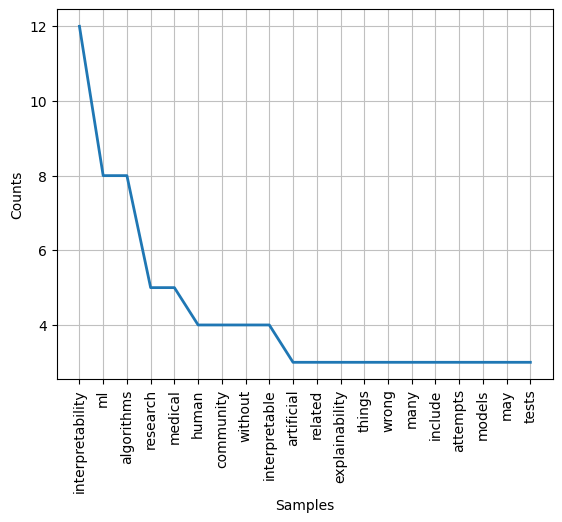

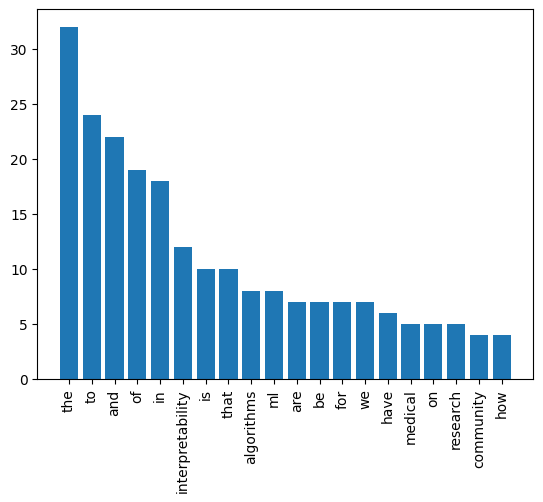

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

nltk.download('stopwords')

def analyze_paper(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Tokenize the content into sentences and words
    sentences = sent_tokenize(content)
    words = word_tokenize(content)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Count the occurrence of each word
    word_freq = nltk.FreqDist(words)

    # Visualize the most common words
    word_freq.plot(20, cumulative=False)
    plt.show()

    # Extract keywords using TF-IDF
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)

    # Visualize the most common words
    feature_names = vectorizer.get_feature_names_out()
    word_freq_vectorized = dict(zip(feature_names, X.sum(axis=0).tolist()[0]))
    sorted_word_freq_vectorized = dict(sorted(word_freq_vectorized.items(), key=lambda item: item[1], reverse=True))

    plt.bar(range(20), list(sorted_word_freq_vectorized.values())[:20], align='center')
    plt.xticks(range(20), list(sorted_word_freq_vectorized.keys())[:20], rotation='vertical')
    plt.show()

# Provide the path to the research paper
research_paper_path = '/content/Research paper.txt'
analyze_paper(research_paper_path)